*Course 2: Python Project 4: part-1*

------

# ***EDA & Data Preprocessing on Google App Store Rating Dataset.***

-------

## <font color = 'red'> *Question 1:*

### <font color = 'grey'> **Import required libraries and read the dataset.**


In [318]:
#Importing required libraries
import pandas as pd
import numpy as np
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing data-preprocessing libraries
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
#importing warning libraries
import warnings
warnings.filterwarnings('ignore')

In [319]:
# reading the dataset
df = pd.read_csv('Apps_data.csv')

In [320]:
# creating a copy of the original dataset for future refrence
data = df.copy()

---------


## <font color = 'red'> *Question 2:*

### <font color = 'grey'> **Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [321]:
# First few samples
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [322]:
# shape of the dataframe
df.shape

(10841, 13)

In [323]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* There are 10841 rows and 13 columns in the given dataset.
* Only the Rating variable is in numerical dtype (float), remaining all are as object. Lets analyse them in proceedings for converting into suitable datatype for model building.
* By count, we can see there are null values present in some of the columns.

-----------------

## <font color = 'red'> *Question 3:*

### <font color = 'grey'>**Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.**

In [324]:
# Checking summary statistics of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [325]:
# Checking summary statistics of object_datatype in the dataset
df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


The Features that are required to be worked upon for model building are : 
* 1. Rating
* 2. Type
* 3. Content Rating
* 4. Price
* 5. Category
* 6. Reviews
* 7. size
* 8. installs

-----------------

## <font color = 'red'> *Question 4:*

### <font color = 'grey'>**Check if there are any duplicate records in the dataset? if any drop them.**

In [326]:
# checking for any duplicate entries

duplicates = df[df.duplicated()]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


* There are duplicates in 483 rows, so lets drop them by retaining the first appearence.

In [327]:
# droping duplicates
df.drop_duplicates(keep = 'first', inplace = True)

In [328]:
# lets recheck the dataset for duplicates
df.duplicated().any()

False

* Now all the duplicates are cleaned in the dataset.

In [329]:
df.shape

(10358, 13)

---------------------

## <font color = 'red'> *Question 5:*

### <font color = 'grey'>**Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [330]:
# checking for unique values
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [331]:
print("The count of unique categories of the column 'category' :",df['Category'].nunique())

The count of unique categories of the column 'category' : 34


In [332]:
# checking for invalid category in the column
invalid = df[df["Category"] == "1.9"]
print("The invalid Category is :")
invalid

The invalid Category is :


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [333]:
# droping the invalid category 
df.drop(10472, inplace = True)

In [334]:
df['Category'].nunique()

33

* Now the column "category" has 33 unique values.

------------

## <font color = 'red'> *Question 6:*

### <font color = 'grey'>**Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).**

In [335]:
# checking for missing values in the column "rating"
print("Number of rows in the column Rating :" , df.shape[0])
print("Count of missing values present in the column Rating :",df.Rating.isna().sum())

Number of rows in the column Rating : 10357
Count of missing values present in the column Rating : 1465


In [336]:
#Finding indexes records with missing ratings.
missing_values = df[df["Rating"].isna()].index
missing_values

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1465)

In [337]:
#Dropping off records with missing values in column "rating"
df.drop(missing_values, inplace=True)

In [338]:
# checking the rows of dataset to see the change in no of rows after droping 
print("Number of rows after droping null values in the column Rating :",df.shape[0])

Number of rows after droping null values in the column Rating : 8892


In [339]:
# Defining a fuction to classify the ratings.
def Rating_category(value):
    if value <= 3.5:
        return "Low"
    elif value > 3.5:
        return "High"

In [340]:
# Creating the column Rating_category and classifying records.
df['Rating_category'] = df['Rating'].map(Rating_category)

In [341]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
5783,Dynamics AX,BUSINESS,3.7,244,976k,"10,000+",Free,0,Everyone,Business,"October 26, 2015",3.3,2.3.3 and up,High


* From the above displayed sample, we can see a new column created as rating_category.

-------------------------------

## <font color = 'red'> *Question 7:*

### <font color = 'grey'>**Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

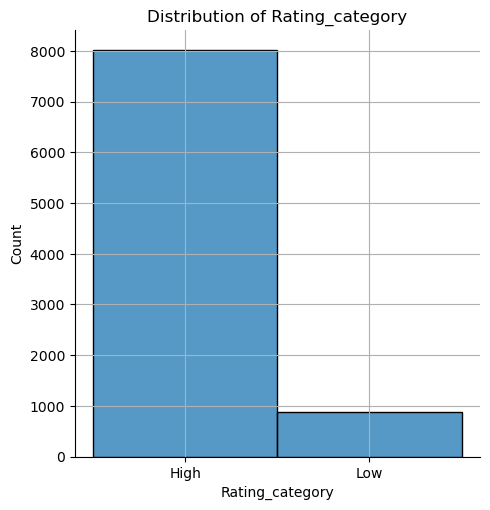

In [342]:
# generating a histogram to check distribution of the rating_category
sns.displot(df['Rating_category'])
plt.title('Distribution of Rating_category')
plt.grid(True)
plt.show()

* From the above plot, we can see that maximun of the entries (8000) are in the category "high" and few entries(aprox. 900) are in category "low".

---------------------


## <font color = 'red'> *Question 8:*

### <font color = 'grey'>**Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation).**


In [343]:
#checking the info of reviews column
df['Reviews'].info()


<class 'pandas.core.series.Series'>
Int64Index: 8892 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
8892 non-null   object
dtypes: object(1)
memory usage: 138.9+ KB


In [344]:
#converting the datatype to numerical
df['Reviews'] = df.Reviews.astype(float)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   float64
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


* It is clear that the datatype is converted into numerical category


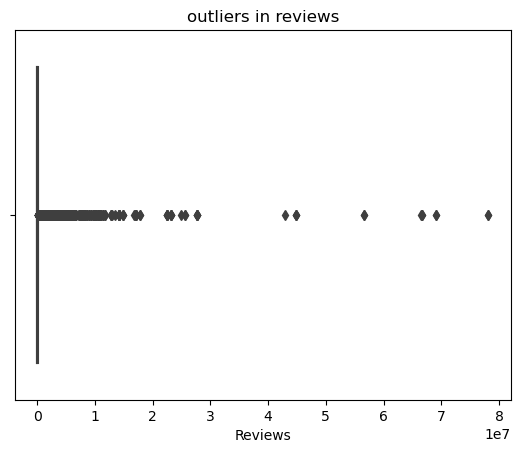

In [346]:
#checking for outliers using a boxplot
sns.boxplot(x=df['Reviews'])
plt.title("outliers in reviews")
plt.show()

* Since we can observe all the outliers are on the upper whisker and has a higher range difference, let us deal them by log transformation method.

In [347]:
# Analysing log transformation to the column "reviews" using log10

log10 = np.log10(df['Reviews'])

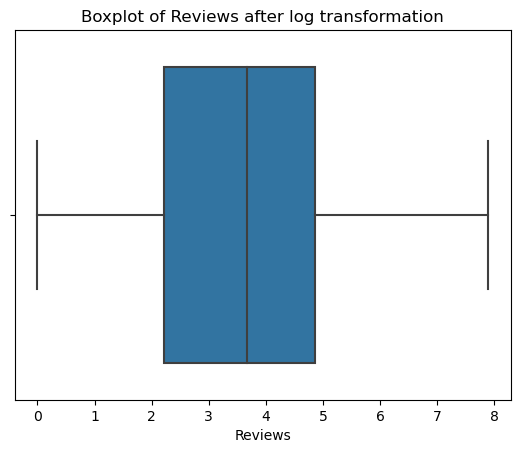

In [348]:
#rechecking for outliers
sns.boxplot(x = log10)
plt.title("Boxplot of Reviews after log transformation")
plt.show()

In [349]:
# Replacing reviews values with their transformed values
df["Reviews"]= log10

In [350]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High


* As we can see that the outliers in revies column has been treated using log transformation.

---------------

## <font color = 'red'> *Question 9:*

### <font color = 'grey'>**The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')**

In [351]:
#checking the info of size column to see what can be done to convert it into numerical
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [352]:
df['Size']=df['Size'].str.replace('M','000000')

In [ ]:
df["Size"] = df["Size"].str.replace("k","000")

In [354]:
df["Size"] = df["Size"].apply(lambda x : x.replace(",",""))
df["Size"]

0                  19000000
1                  14000000
2                 8.7000000
3                  25000000
4                 2.8000000
                ...        
10834             2.6000000
10836              53000000
10837             3.6000000
10839    Varies with device
10840              19000000
Name: Size, Length: 8892, dtype: object

* In the size column, string "M" and 'K' are replaced with respective numericals.

In [355]:
# lets see the index of the string " varies_with_device" entry in the size column
Varies_with_device = df[df["Size"] == "Varies with device"].index

In [356]:
Varies_with_device

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1468)

In [357]:
#droping those index entries with invalid dtype
df.drop(Varies_with_device,inplace=True)


In [358]:
df.Size

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7424, dtype: object

In [359]:
df['Size']=df['Size'].astype(float)
df['Size']

0        19000000.0
1        14000000.0
2               8.7
3        25000000.0
4               2.8
            ...    
10833      619000.0
10834           2.6
10836    53000000.0
10837           3.6
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

* Finally the datatype of size column is changed to numerical category.

-----------------

## <font color = 'red'> *Question 10:*

### <font color = 'grey'>**Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**


In [168]:
#checking info installs column
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [169]:
#Applying lambda function to replace invalid entries
df["Installs"] = df["Installs"].apply(lambda x : x.replace(",",""))
df["Installs"] = df["Installs"].apply(lambda x : x.replace("+",""))
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [170]:
#converting the datatype of the column to numerical
df["Installs"]=df["Installs"].astype(int)

In [171]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

* The column 'Installs' has been treated and converted the column into a suitable data type.

----------------------

## <font color = 'red'> *Question 11:*

### <font color = 'grey'>**Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [172]:
# checking unique values in the column price
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [173]:
#replaceing the string chracters 
df["Price"]=df["Price"].str.replace('$','')
df["Price"]

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

In [174]:
#converting into numerical datatype
df["Price"]=df["Price"].astype(float)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int32  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   float64
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(4), int32(1), object(9)
memory usage: 841.0+ KB


* We have removed all the unwanted characters from the price column and converted into float dtype.


--------------

## <font color = 'red'> *Question 12:*

### <font color = 'grey'>**Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis).**

In [176]:
#Droping the columns which are redundant for the analysis
df = df.drop(['App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver'],axis=1)

In [177]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,4.942058,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,2.985426,2.8,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,1.643453,619000.0,1000,Free,0.0,Everyone,High
10834,FAMILY,0.845098,2.6,500,Free,0.0,Everyone,High
10836,FAMILY,1.579784,53000000.0,5000,Free,0.0,Everyone,High
10837,FAMILY,0.602060,3.6,100,Free,0.0,Everyone,High


---------------

## <font color = 'red'> *Question 13:*


### <font color = 'grey'>**Encode the categorical columns.**


Since we have already checked the unique values in the column category i.e., 33 , we can't apply get_dummies method for this column.So let us apply labelencoding method only for this column to convert into numericals. Remaining columns will be converted by get_dummies(boolean values).

In [178]:
# Importing Label Encoder in order to perform label encoding.
from sklearn.preprocessing import LabelEncoder

In [179]:
labelencoder = LabelEncoder()

In [180]:
df["Category"] = labelencoder.fit_transform(df["Category"])

In [181]:
df.head(4)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000.0,10000,Free,0.0,Everyone,High
1,0,2.985426,14000000.0,500000,Free,0.0,Everyone,High
2,0,4.942058,8.7,5000000,Free,0.0,Everyone,High
3,0,5.333737,25000000.0,50000000,Free,0.0,Teen,High


In [182]:
# Checking the values of all categories after label Encoding.
df.Category.value_counts()

11    1591
14     959
29     634
23     279
20     277
18     273
12     263
28     232
25     231
4      225
24     225
6      206
15     199
27     170
21     162
26     159
30     147
3      143
7      141
31     116
19      95
8       95
13      82
9       67
1       63
17      62
0       59
32      51
16      50
5       49
22      44
10      38
2       37
Name: Category, dtype: int64

* As we can se the above output describes that each category entry has been encoded as numerical value. 

In [183]:
#Applying get_dummies method to change into numerical catergory
df = pd.get_dummies(df,columns=['Type','Content Rating'],drop_first=True)

In [184]:
df['Rating_category'].value_counts()

High    6599
Low      825
Name: Rating_category, dtype: int64

* Since the value "high" has majority of the entries, lets keep that for prediction at first.

In [185]:
df = pd.get_dummies(df,columns=['Rating_category'],drop_first = False)

In [188]:
df = df.drop(['Rating_category_Low'],axis=1)

In [189]:
df.sample(5)

,Category,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_High
6451,18,2.505150,31000000.0,50000,0.0,0,1,0,0,0,0,0
10687,11,5.439408,41000000.0,10000000,0.0,0,0,0,0,1,0,1
8381,25,1.633468,34000.0,1000,0.0,0,1,0,0,0,0,1
314,5,2.496930,6.1,100000,0.0,0,1,0,0,0,0,1
922,9,4.170467,19000000.0,1000000,0.0,0,0,0,0,1,0,1


* Finally all the columns are converted to numerical data and out dataset is ready for model building.

----------------

## <font color = 'red'> *Question 14:*

### <font color = 'grey'>**Segregate the target and independent features (Hint: Use Rating_category as the target)**


In [190]:
#Segregating the independent features in variable x
x = df.drop('Rating_category_High',axis=1)

#Segregating the target features in variable y
y = df['Rating_category_High']

## <font color = 'red'> *Question 15:*

### <font color = 'grey'>**Split the dataset into train and test.**

* Lets split and assign data as train dataset and test dataset for both  target and independent variables.
* 70% of data in train and 30% of data in test with a seed value 7

In [202]:
X_train,y_train,X_test,y_test = train_test_split(x,y,test_size = 0.30,random_state=7)

In [203]:
X_train

,Category,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5668,11,1.986772,3.9,10000,0.0,0,1,0,0,0,0
6396,18,1.000000,3.0,1000,0.0,0,1,0,0,0,0
3555,25,4.414723,6.9,1000000,0.0,0,1,0,0,0,0
6522,17,2.079181,782000.0,10000,0.0,0,1,0,0,0,0
3281,29,5.073495,16000000.0,10000000,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8438,11,4.985238,26000000.0,1000000,0.0,0,0,1,0,0,0
4092,25,3.668386,5.9,1000000,0.0,0,1,0,0,0,0
874,9,6.262044,52000000.0,100000000,0.0,0,1,0,0,0,0
1931,14,5.603604,70000000.0,10000000,0.0,0,1,0,0,0,0


In [204]:
X_test

5668    1
6396    1
3555    1
6522    1
3281    1
       ..
8438    1
4092    1
874     1
1931    1
6381    1
Name: Rating_category_High, Length: 5196, dtype: uint8

In [205]:
y_train

,Category,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5406,29,1.505150,33000000.0,10000,0.00,0,1,0,0,0,0
5037,24,5.218073,15000000.0,10000000,0.00,0,1,0,0,0,0
10601,30,1.963788,20000000.0,10000,0.00,0,1,0,0,0,0
7124,6,2.961895,12000000.0,100000,0.00,0,0,0,1,0,0
1162,12,5.004308,33000000.0,5000000,0.00,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6837,4,1.447158,20000000.0,500,17.99,1,1,0,0,0,0
4107,29,5.951549,3.1,50000000,0.00,0,0,0,0,1,0
2915,24,6.174493,21000000.0,50000000,0.00,0,1,0,0,0,0
10206,6,4.883650,4.3,1000000,0.00,0,0,0,0,1,0


In [206]:
y_test

5406     1
5037     1
10601    1
7124     1
1162     1
        ..
6837     0
4107     1
2915     1
10206    1
10326    1
Name: Rating_category_High, Length: 2228, dtype: uint8

-------------------------------

## <font color = 'red'> *Question 16:*

### <font color = 'grey'>**Standardize the data, so that the values are within a particular range.**

In [207]:
# Lets asign the standardscaler method from sklearn library as "scaler"
scaler = StandardScaler()


In [209]:
# Now let us standardize the data within a particular range
df = scaler.fit_transform(df)

In [211]:
df

array([[-2.03766618, -0.67995305, -0.07422317, ..., -0.35526552,
        -0.01160674,  0.35358018],
       [-2.03766618, -0.19653147, -0.27499084, ..., -0.35526552,
        -0.01160674,  0.35358018],
       [-2.03766618,  1.0099001 , -0.83713998, ..., -0.35526552,
        -0.01160674,  0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29099702, ..., -0.35526552,
        -0.01160674,  0.35358018],
       [-0.68621673, -1.66608206, -0.83714018, ..., -0.35526552,
        -0.01160674,  0.35358018],
       [ 0.17379656,  1.41571255, -0.07422317, ..., -0.35526552,
        -0.01160674,  0.35358018]])

In [212]:
#since the dataset after scaling got converted into a numpy array, to visualize let us converte it into a dataframe
df = pd.DataFrame(df)

In [213]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.037666,-0.679953,-0.074223,-0.168764,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
1,-2.037666,-0.196531,-0.274991,-0.158181,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
2,-2.037666,1.009900,-0.837140,-0.060990,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
3,-2.037666,1.251404,0.166698,0.910911,-0.063058,-0.282029,-2.015966,-0.204853,-0.216364,2.814796,-0.011607,0.35358
4,-2.037666,-0.196531,-0.837140,-0.166820,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
...,...,...,...,...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.812285,-0.168958,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
7420,-0.686217,-1.516228,-0.837140,-0.168969,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
7421,-0.686217,-1.063231,1.290997,-0.168872,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358
7422,-0.686217,-1.666082,-0.837140,-0.168977,-0.063058,-0.282029,0.496040,-0.204853,-0.216364,-0.355266,-0.011607,0.35358


* Finally the data is standardized within a particular range and is ready for model building process.

------------------------

### <font color = 'purple'> *Thankyou!*